In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [2]:
flower = cv2.imread('Flower.jpg')

In [3]:
flower = cv2.resize(flower,(600,800))

In [4]:
cv2.imshow('Original',flower)
cv2.waitKey()==13
cv2.destroyAllWindows()

In [5]:
s = flower.shape
s

(800, 600, 3)

### converting image to gray

In [6]:
grayFlower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

In [7]:
grayFlower

array([[ 56,  56,  56, ..., 143, 142, 143],
       [ 57,  57,  57, ..., 144, 143, 143],
       [ 59,  56,  57, ..., 141, 144, 143],
       ...,
       [133, 133, 132, ...,  87,  85,  86],
       [130, 132, 131, ...,  87,  85,  86],
       [127, 128, 130, ...,  86,  86,  85]], dtype=uint8)

In [8]:
cv2.imshow('grayFlower',grayFlower)
cv2.waitKey()==13
cv2.destroyAllWindows()

### adjusting image constraction and brightness

In [9]:
scaledGrayFlower = cv2.convertScaleAbs(grayFlower, alpha = 1.10, beta = -20)

In [10]:
scaledGrayFlower.shape

(800, 600)

In [11]:
scaledGrayFlower

array([[ 42,  42,  42, ..., 137, 136, 137],
       [ 43,  43,  43, ..., 138, 137, 137],
       [ 45,  42,  43, ..., 135, 138, 137],
       ...,
       [126, 126, 125, ...,  76,  74,  75],
       [123, 125, 124, ...,  76,  74,  75],
       [120, 121, 123, ...,  75,  75,  74]], dtype=uint8)

In [12]:
cv2.imshow('grayFlower',grayFlower)
cv2.imshow('scaledGrayFlower',scaledGrayFlower)
cv2.waitKey()==13
cv2.destroyAllWindows()

### zeros araay

In [13]:
H = numpy.zeros(shape=256)

In [14]:
H

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### counting pixels

#### Histogram function

In [15]:
def Hist(image):
    H = numpy.zeros(shape=256)
    s = image.shape
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i,j]
            H[k] = H[k] + 1
    return H

#### constract image

In [16]:
scaledFlowerHist = Hist(scaledGrayFlower)

In [17]:
#H

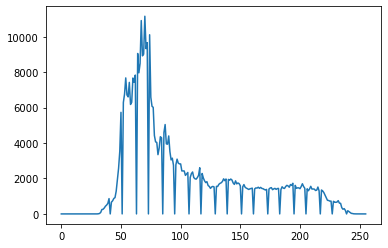

In [18]:
plt.plot(scaledFlowerHist)
plt.show()

#### gray image

In [19]:
grayFlowerHist = Hist(grayFlower)

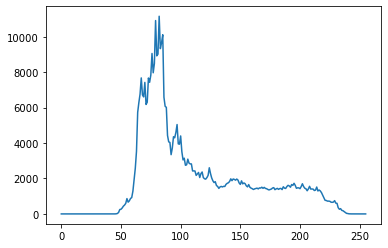

In [20]:
plt.plot(grayFlowerHist)
plt.show()

# 2nd

In [21]:
x = scaledFlowerHist.reshape(1,256)

In [22]:
y = numpy.array([])

In [23]:
y = numpy.append(y,x[0,0])

In [24]:
for i in range(255):
    k = x[0,i+1] + y[i]
    y = numpy.append(y,k)
y = numpy.round((y/(s[0]*s[1]))*(256-1))

In [25]:
for i in range(s[0]):
    for j in range(s[1]):
        k = scaledGrayFlower[i,j]
        scaledGrayFlower[i,j] = y[k]

In [26]:
cv2.imshow('scaledGrayFlower',scaledGrayFlower)
cv2.waitKey()==13
cv2.destroyAllWindows()

In [27]:
equalizeHist = Hist(scaledGrayFlower)

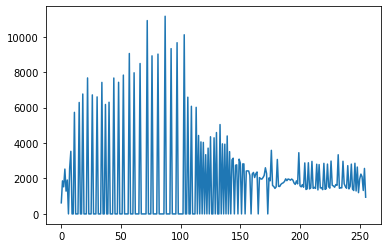

In [28]:
plt.plot(equalizeHist)
plt.show()

# Matching

In [29]:
import pandas as pd

In [30]:
pd.DataFrame(scaledFlowerHist, columns = ['scaledFlowerHist'])

,scaledFlowerHist
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
251,0.0
252,0.0
253,0.0
254,0.0


In [31]:
pd.DataFrame(grayFlowerHist, columns = ['grayFlowerHist'])

,grayFlowerHist
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
251,0.0
252,0.0
253,0.0
254,0.0


In [32]:
numpy.corrcoef(scaledFlowerHist,grayFlowerHist)

array([[1.        , 0.61091132],
       [0.61091132, 1.        ]])